# Multi-armed bandit (MAB) 알고리즘
- 광고와 같은 추천에 사용
  - 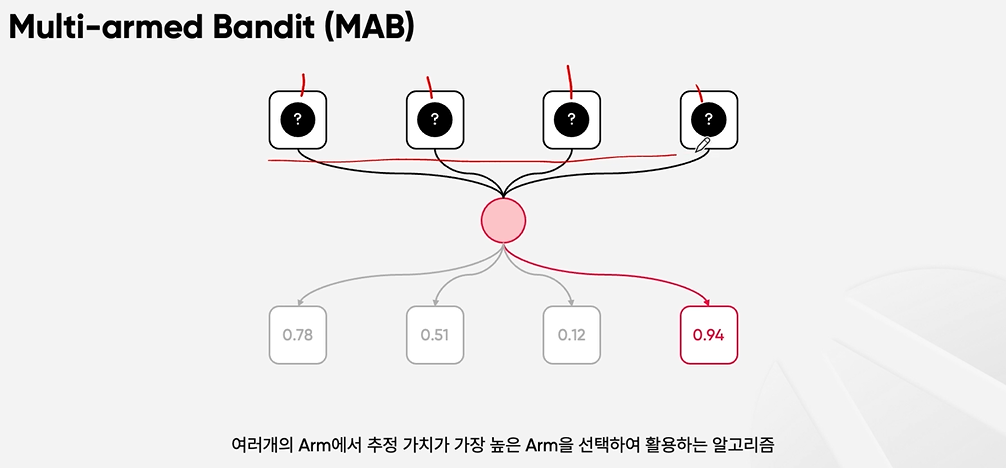
  - 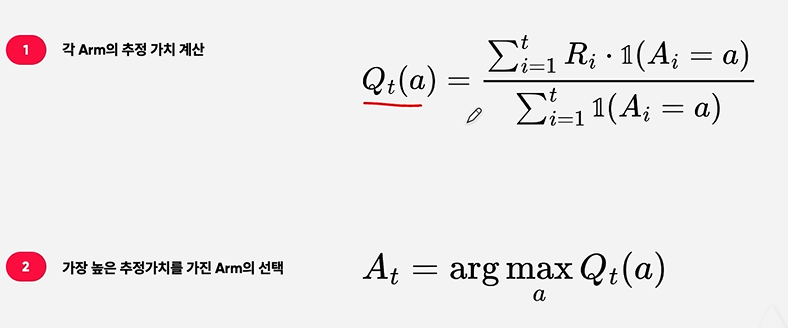
    - 1()은 ()안의 값이 true면 1 아니면 0을 의미
- Exploration (탐색)
- Exploitation (활용)
- 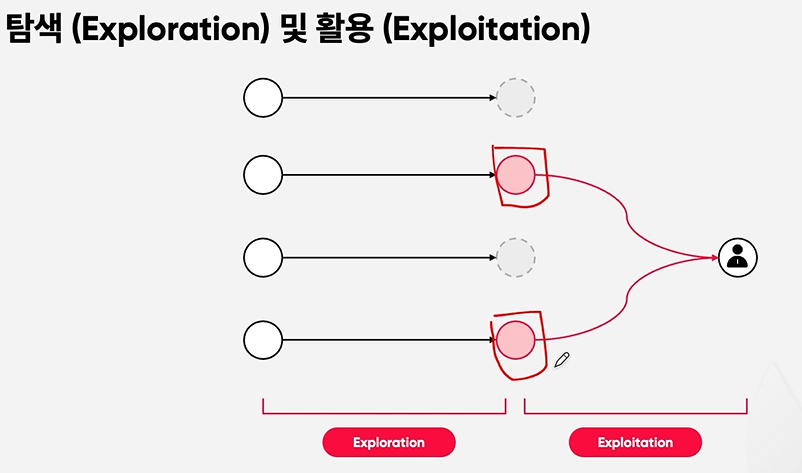
- 알고리즘
  - 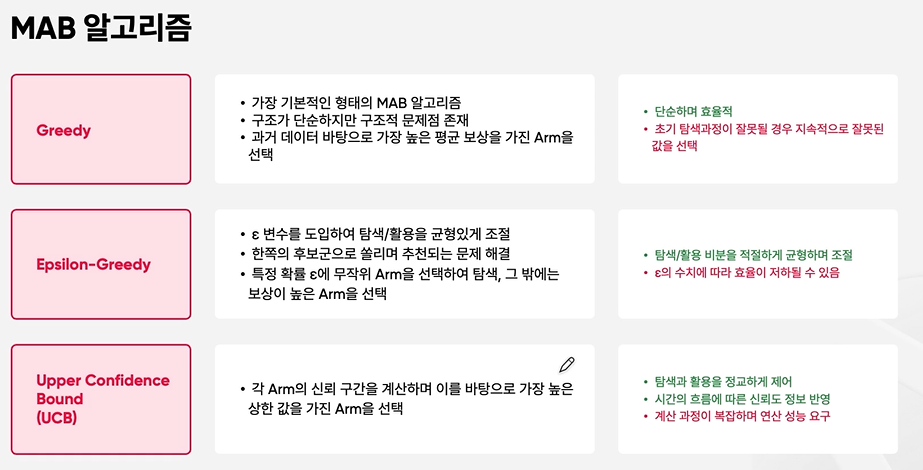

In [3]:
import numpy as np

In [8]:
class EpsilonGreedyMAB:
    def __init__(self, epsilon: float, n_arms: int):
        self.epsilon= epsilon
        self.n_arms= n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self) -> int:
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, chosen_arm: int, reward: float) -> None:
        self.counts[chosen_arm] += 1
        n= self.counts[chosen_arm]
        value= self.values[chosen_arm]
        new_value= ((n-1) / n) * value + (1/n) * reward
        self.values[chosen_arm]= new_value

In [9]:
n_arms= 4
epsilon= 0.1
mab = EpsilonGreedyMAB(epsilon, n_arms)

np.random.seed(1)
rewards = np.random.rand(n_arms, 10)

for _ in range(100):
    chosen_arm = mab.select_arm()
    reward = rewards[chosen_arm, np.random.randint(0, 10)]
    mab.update(chosen_arm, reward)

print("선택 횟수: ", mab.counts)
print("추정 가치: ", mab.values)

선택 횟수:  [28.  3.  5. 64.]
추정 가치:  [0.28964439 0.27941401 0.38501474 0.53042223]
